In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
from matplotlib import image

sys.path.append('../../diffusion')
from diffusion import Diffusion
from torchvision import transforms
from PIL import Image

In [2]:
# Reading the image
img = Image.open("../images/cat.jpg")

transform = transforms.Compose([
    transforms.
    transforms.ToTensor(),
    transforms.Lambda(lambda im: im * 2 - 1)
])
reverse_transform = transforms.Compose([
    transforms.Lambda(lambda im: (im + 1) / 2),
    transforms.Lambda(lambda im: im.permute(1, 2, 0)),
    transforms.Lambda(lambda im: im * 255.),
    transforms.Lambda(lambda im: im.numpy().astype(np.uint8))
])

# Normalizing the img to [-1, 1] range, since the noise will be sampled from a normal distribution
x0_l = transform(img)
x0_c = transform(img)


In [3]:
# Sanity check
transformed_img = transform(img)
retransformed_img = reverse_transform(transformed_img)
retransformed_img.shape

(440, 640, 3)

In [4]:
# Creating the diffusion model, setting the linear noise scheduler, running the forward diffusion process for different steps.
linear_diffusion = Diffusion(num_steps=1000, noise_scheduler='linear')
linear_diffusion.set_scheduler(beta_start=0.0001, beta_stop=0.02)
x200_l = linear_diffusion.forward_process(x0_l, 200)
x400_l = linear_diffusion.forward_process(x0_l, 400)
x600_l = linear_diffusion.forward_process(x0_l, 600)
x800_l = linear_diffusion.forward_process(x0_l, 800)
x1000_l = linear_diffusion.forward_process(x0_l, 1000)
xs_l = [x0_l, x200_l, x400_l, x600_l, x800_l, x1000_l]

In [5]:
# Creating the diffusion model, setting the cosine noise scheduler, running the forward diffusion process for different steps.
cosine_diffusion = Diffusion(num_steps=1000, noise_scheduler='cosine')
cosine_diffusion.set_scheduler(max_beta=0.999)
x200_c = cosine_diffusion.forward_process(x0_c, 200)
x400_c = cosine_diffusion.forward_process(x0_c, 400)
x600_c = cosine_diffusion.forward_process(x0_c, 600)
x800_c = cosine_diffusion.forward_process(x0_c, 800)
x1000_c = cosine_diffusion.forward_process(x0_c, 1000)
xs_c = [x0_c, x200_c, x400_c, x600_c, x800_c, x1000_c]

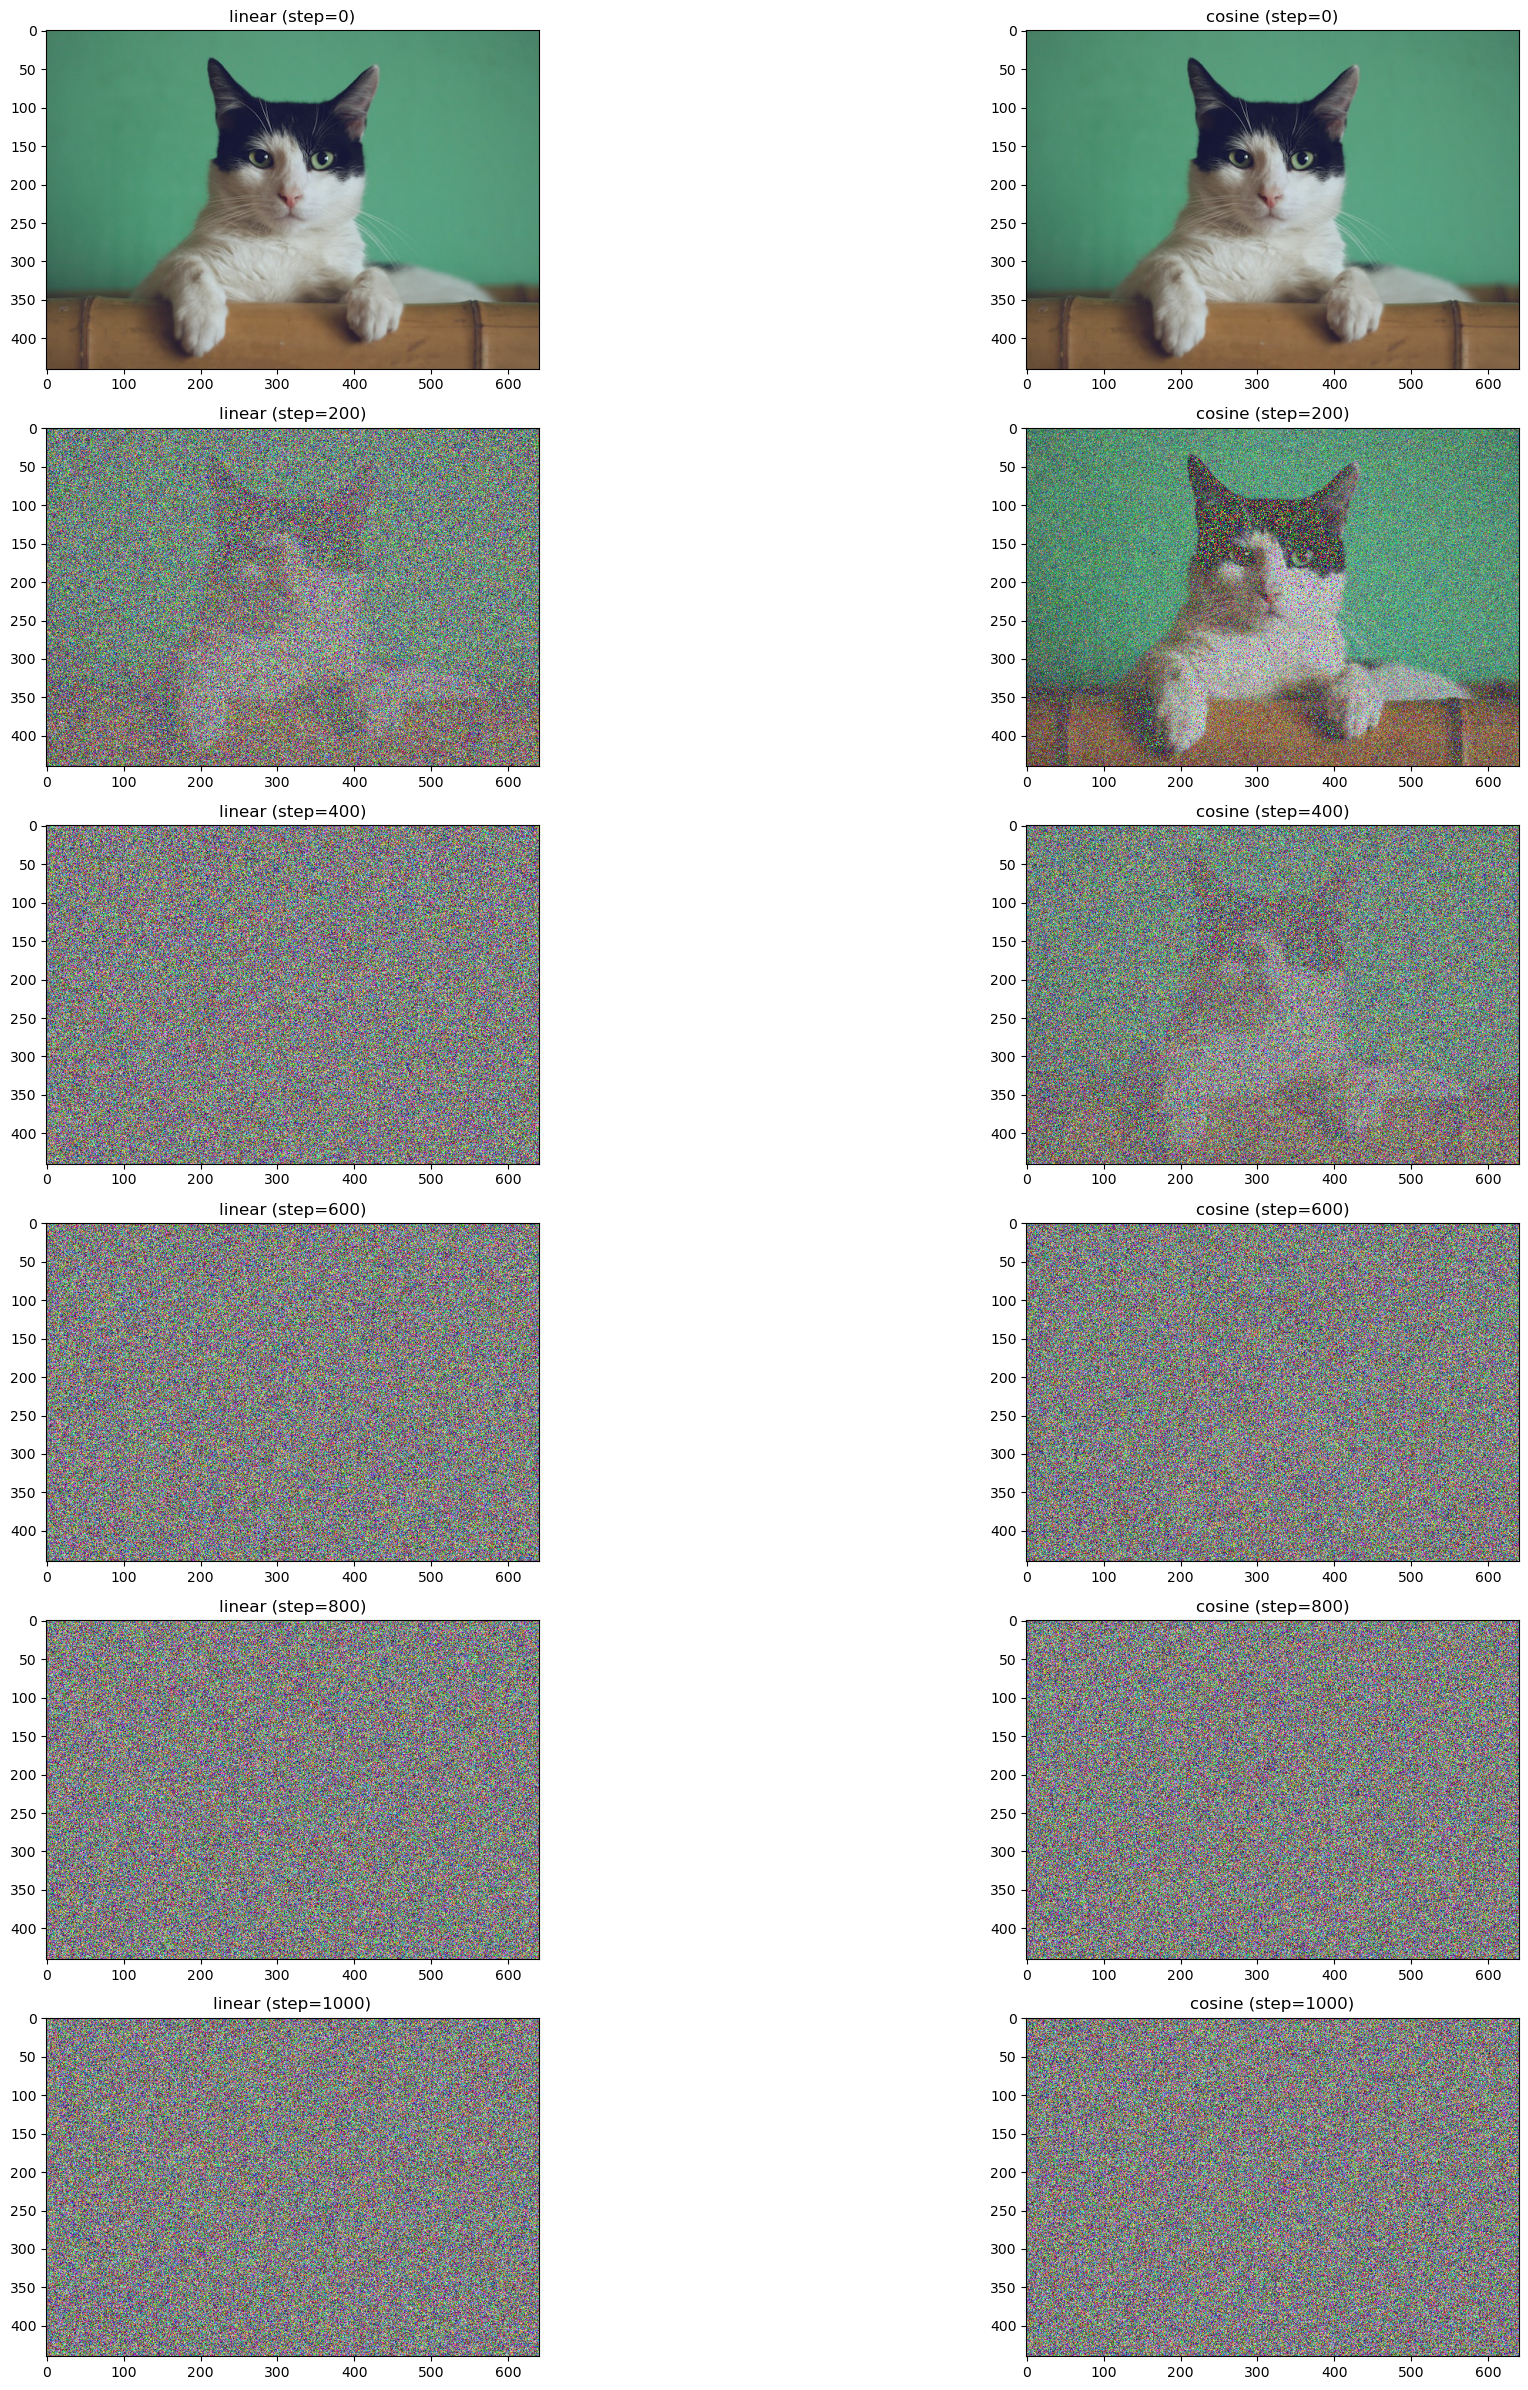

In [6]:
# Displaying noised images for different steps to compare the effects of linear and cosine noise scheduler.
fig = plt.figure(figsize=(24, 24))
for idx, (x_l, x_c) in enumerate(zip(xs_l, xs_c)):
    axl = fig.add_subplot(6, 2, 2*idx+1)
    axl.set_title(f"linear (step={200*idx})")
    plt.imshow(reverse_transform(x_l))

    axc = fig.add_subplot(6, 2, 2*idx+2)
    axc.set_title(f"cosine (step={200*idx})")
    plt.imshow(reverse_transform(x_c))

plt.tight_layout()
plt.show()